# Push notifications on 'Wusool' program


In [264]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# read csv file

In [265]:
df = pd.read_csv('Wusol.csv', delimiter =';')
df

,serial number,Status,Region,City,National Address City,The first flight date,Last flight,date of registration
0,1,Effective (has taken at least one trip in the ...,Makkah,Thoul,#VALUE!,2021/04/15,2021/04/16,2021/04/12
1,2,Effective (has taken at least one trip in the ...,Riyadh,Tarif,#VALUE!,2021/03/02,2021/04/20,2021/03/01
2,3,Excluded,Riyadh,#VALUE!,#VALUE!,#VALUE!,#VALUE!,2021/03/10
3,4,Qualified,Eastern Region,the news,#VALUE!,#VALUE!,#VALUE!,2021/03/01
4,5,Effective (has taken at least one trip in the ...,Riyadh,Al-Harut (Riyadh Emirate),#VALUE!,2020/11/04,2021/04/20,2020/11/04
...,...,...,...,...,...,...,...,...
4995,4996,Effective (has taken at least one trip in the ...,Medina,Medina,Medina,2019/05/10,2019/07/23,2019/04/25
4996,4997,Effective (has taken at least one trip in the ...,Riyadh,Dawadmi,Riyadh,2021/03/21,2021/04/20,2021/03/20
4997,4998,Effective (has taken at least one trip in the ...,Riyadh,Dawadmi,Riyadh,2021/04/13,2021/04/16,2021/04/06
4998,4999,Effective (has taken at least one trip in the ...,Riyadh,Tarif,Riyadh,2019/07/03,2021/04/12,2021/01/21


# Edit column names

In [266]:
df.rename(columns={'serial number': 'ID', 'The first flight date': 'The first trip date', 'Last flight': 'The last trip date'}, inplace=True)
df.head()

,ID,Status,Region,City,National Address City,The first trip date,The last trip date,date of registration
0,1,Effective (has taken at least one trip in the ...,Makkah,Thoul,#VALUE!,2021/04/15,2021/04/16,2021/04/12
1,2,Effective (has taken at least one trip in the ...,Riyadh,Tarif,#VALUE!,2021/03/02,2021/04/20,2021/03/01
2,3,Excluded,Riyadh,#VALUE!,#VALUE!,#VALUE!,#VALUE!,2021/03/10
3,4,Qualified,Eastern Region,the news,#VALUE!,#VALUE!,#VALUE!,2021/03/01
4,5,Effective (has taken at least one trip in the ...,Riyadh,Al-Harut (Riyadh Emirate),#VALUE!,2020/11/04,2021/04/20,2020/11/04


# Drop columns
There are columns I don't need like "City" and "National Address City" so removing them is better for time and space.

In [267]:
df.drop(
    labels=['City', 'National Address City'],
    axis=1,
    inplace=True
)
df

,ID,Status,Region,The first trip date,The last trip date,date of registration
0,1,Effective (has taken at least one trip in the ...,Makkah,2021/04/15,2021/04/16,2021/04/12
1,2,Effective (has taken at least one trip in the ...,Riyadh,2021/03/02,2021/04/20,2021/03/01
2,3,Excluded,Riyadh,#VALUE!,#VALUE!,2021/03/10
3,4,Qualified,Eastern Region,#VALUE!,#VALUE!,2021/03/01
4,5,Effective (has taken at least one trip in the ...,Riyadh,2020/11/04,2021/04/20,2020/11/04
...,...,...,...,...,...,...
4995,4996,Effective (has taken at least one trip in the ...,Medina,2019/05/10,2019/07/23,2019/04/25
4996,4997,Effective (has taken at least one trip in the ...,Riyadh,2021/03/21,2021/04/20,2021/03/20
4997,4998,Effective (has taken at least one trip in the ...,Riyadh,2021/04/13,2021/04/16,2021/04/06
4998,4999,Effective (has taken at least one trip in the ...,Riyadh,2019/07/03,2021/04/12,2021/01/21


# Edit translation errors
This data is Saudi and it was in Arabic , I translated it into English and errors occurred in the translation and here they have been corrected , and abbreviated some words.

In [268]:
df = df.replace('#VALUE!', np.NaN)
df = df.replace('15th', 15)
df = df.replace('three hundred fifty', 350)
df = df.replace('ten thirty', 1030)
df = df.replace('Effective (has taken at least one trip in the program)', 'Effective')
df = df.replace('Hollow', 'Al-Jouf')
df = df.replace('difficult', 'Asir')
df = df.replace('Patio', 'Al-Baha')
df.head(30)

,ID,Status,Region,The first trip date,The last trip date,date of registration
0,1,Effective,Makkah,2021/04/15,2021/04/16,2021/04/12
1,2,Effective,Riyadh,2021/03/02,2021/04/20,2021/03/01
2,3,Excluded,Riyadh,NaN,NaN,2021/03/10
3,4,Qualified,Eastern Region,NaN,NaN,2021/03/01
4,5,Effective,Riyadh,2020/11/04,2021/04/20,2020/11/04
5,6,Qualified,Riyadh,NaN,NaN,2021/03/20
6,7,Effective,NaN,2020/12/30,2021/02/18,2020/12/21
7,8,Excluded,Riyadh,2020/12/27,2021/03/20,2020/12/27
8,9,Effective,Eastern Region,2020/12/01,2021/04/15,2020/11/30
9,10,Excluded,Riyadh,2020/07/27,2020/08/20,2020/07/27


# data type
Change the data type in the date columns to a date type, and column "ID" to int data type, and the column "Region" to str data type.

In [269]:
df[["date of registration", "The last trip date", "The first trip date"]] = df[["date of registration", "The last trip date", "The first trip date"]].apply(pd.to_datetime)
df = df.astype({"ID": int})
df = df.astype({"Region": str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    5000 non-null   int32         
 1   Status                5000 non-null   object        
 2   Region                5000 non-null   object        
 3   The first trip date   4083 non-null   datetime64[ns]
 4   The last trip date    4083 non-null   datetime64[ns]
 5   date of registration  5000 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int32(1), object(2)
memory usage: 215.0+ KB


In [270]:
df

,ID,Status,Region,The first trip date,The last trip date,date of registration
0,1,Effective,Makkah,2021-04-15,2021-04-16,2021-04-12
1,2,Effective,Riyadh,2021-03-02,2021-04-20,2021-03-01
2,3,Excluded,Riyadh,NaT,NaT,2021-03-10
3,4,Qualified,Eastern Region,NaT,NaT,2021-03-01
4,5,Effective,Riyadh,2020-11-04,2021-04-20,2020-11-04
...,...,...,...,...,...,...
4995,4996,Effective,Medina,2019-05-10,2019-07-23,2019-04-25
4996,4997,Effective,Riyadh,2021-03-21,2021-04-20,2021-03-20
4997,4998,Effective,Riyadh,2021-04-13,2021-04-16,2021-04-06
4998,4999,Effective,Riyadh,2019-07-03,2021-04-12,2021-01-21


Removed all rows containing 'Excluded' because they are not needed in this project

In [271]:
df.drop(df[df['Status'] == 'Excluded'].index, inplace = True)
df

,ID,Status,Region,The first trip date,The last trip date,date of registration
0,1,Effective,Makkah,2021-04-15,2021-04-16,2021-04-12
1,2,Effective,Riyadh,2021-03-02,2021-04-20,2021-03-01
3,4,Qualified,Eastern Region,NaT,NaT,2021-03-01
4,5,Effective,Riyadh,2020-11-04,2021-04-20,2020-11-04
5,6,Qualified,Riyadh,NaT,NaT,2021-03-20
...,...,...,...,...,...,...
4994,4995,Effective,Riyadh,2020-11-23,2021-04-09,2020-11-22
4995,4996,Effective,Medina,2019-05-10,2019-07-23,2019-04-25
4996,4997,Effective,Riyadh,2021-03-21,2021-04-20,2021-03-20
4997,4998,Effective,Riyadh,2021-04-13,2021-04-16,2021-04-06


# index reset

In [272]:
df.reset_index(drop=True, inplace=True)
df

,ID,Status,Region,The first trip date,The last trip date,date of registration
0,1,Effective,Makkah,2021-04-15,2021-04-16,2021-04-12
1,2,Effective,Riyadh,2021-03-02,2021-04-20,2021-03-01
2,4,Qualified,Eastern Region,NaT,NaT,2021-03-01
3,5,Effective,Riyadh,2020-11-04,2021-04-20,2020-11-04
4,6,Qualified,Riyadh,NaT,NaT,2021-03-20
...,...,...,...,...,...,...
2471,4995,Effective,Riyadh,2020-11-23,2021-04-09,2020-11-22
2472,4996,Effective,Medina,2019-05-10,2019-07-23,2019-04-25
2473,4997,Effective,Riyadh,2021-03-21,2021-04-20,2021-03-20
2474,4998,Effective,Riyadh,2021-04-13,2021-04-16,2021-04-06


Reset index for column "ID" starting at 1

In [273]:
df['ID'] = np.arange(1,len(df)+1)
df

,ID,Status,Region,The first trip date,The last trip date,date of registration
0,1,Effective,Makkah,2021-04-15,2021-04-16,2021-04-12
1,2,Effective,Riyadh,2021-03-02,2021-04-20,2021-03-01
2,3,Qualified,Eastern Region,NaT,NaT,2021-03-01
3,4,Effective,Riyadh,2020-11-04,2021-04-20,2020-11-04
4,5,Qualified,Riyadh,NaT,NaT,2021-03-20
...,...,...,...,...,...,...
2471,2472,Effective,Riyadh,2020-11-23,2021-04-09,2020-11-22
2472,2473,Effective,Medina,2019-05-10,2019-07-23,2019-04-25
2473,2474,Effective,Riyadh,2021-03-21,2021-04-20,2021-03-20
2474,2475,Effective,Riyadh,2021-04-13,2021-04-16,2021-04-06


Make the "ID" column the index column

In [274]:
df.set_index('ID',inplace=True)
df

,Status,Region,The first trip date,The last trip date,date of registration
ID,,,,,
1,Effective,Makkah,2021-04-15,2021-04-16,2021-04-12
2,Effective,Riyadh,2021-03-02,2021-04-20,2021-03-01
3,Qualified,Eastern Region,NaT,NaT,2021-03-01
4,Effective,Riyadh,2020-11-04,2021-04-20,2020-11-04
5,Qualified,Riyadh,NaT,NaT,2021-03-20
...,...,...,...,...,...
2472,Effective,Riyadh,2020-11-23,2021-04-09,2020-11-22
2473,Effective,Medina,2019-05-10,2019-07-23,2019-04-25
2474,Effective,Riyadh,2021-03-21,2021-04-20,2021-03-20


A graph showing the percentage of qualified cases and active effective

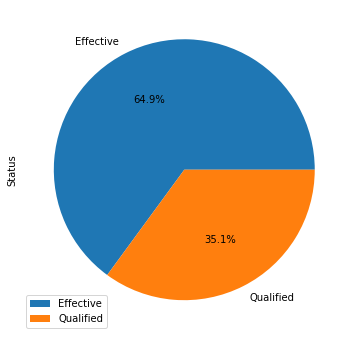

In [275]:
type_counts = df['Status'].value_counts()
df1 = pd.DataFrame({'Status': type_counts})
df1.plot.pie(y='Status', figsize=(6,6), autopct='%1.1f%%');

In [276]:
df

,Status,Region,The first trip date,The last trip date,date of registration
ID,,,,,
1,Effective,Makkah,2021-04-15,2021-04-16,2021-04-12
2,Effective,Riyadh,2021-03-02,2021-04-20,2021-03-01
3,Qualified,Eastern Region,NaT,NaT,2021-03-01
4,Effective,Riyadh,2020-11-04,2021-04-20,2020-11-04
5,Qualified,Riyadh,NaT,NaT,2021-03-20
...,...,...,...,...,...
2472,Effective,Riyadh,2020-11-23,2021-04-09,2020-11-22
2473,Effective,Medina,2019-05-10,2019-07-23,2019-04-25
2474,Effective,Riyadh,2021-03-21,2021-04-20,2021-03-20


In [277]:
from collections import Counter
df2 = Counter(" ".join(df["Region"]).split()).most_common(3)
df2

[('Riyadh', 1490), ('Makkah', 371), ('Eastern', 163)]

Another graph showing the top 3 regions using the program

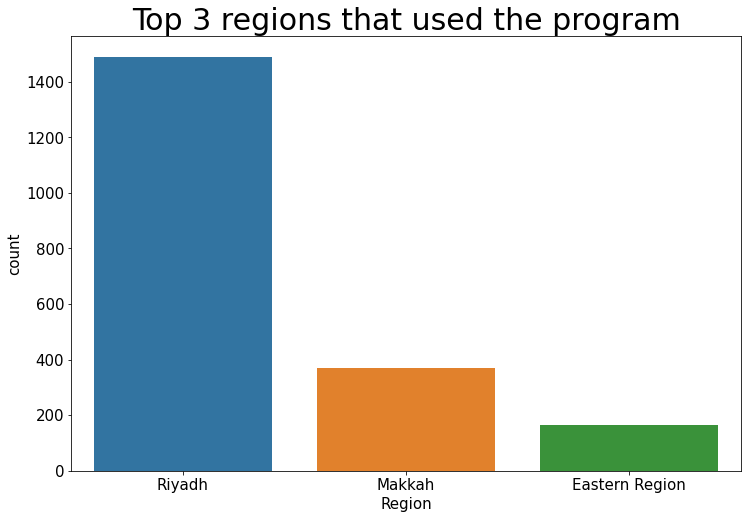

In [278]:
plt.rcParams["font.size"]=(15)
plt.figure(figsize = [12,8])
sns.countplot(x="Region", data=df, order=['Riyadh','Makkah',"Eastern Region"]);
plt.title("Top 3 regions that used the program", fontsize=30);

A graph showing the rest of the regions that use the program compared to the top of them

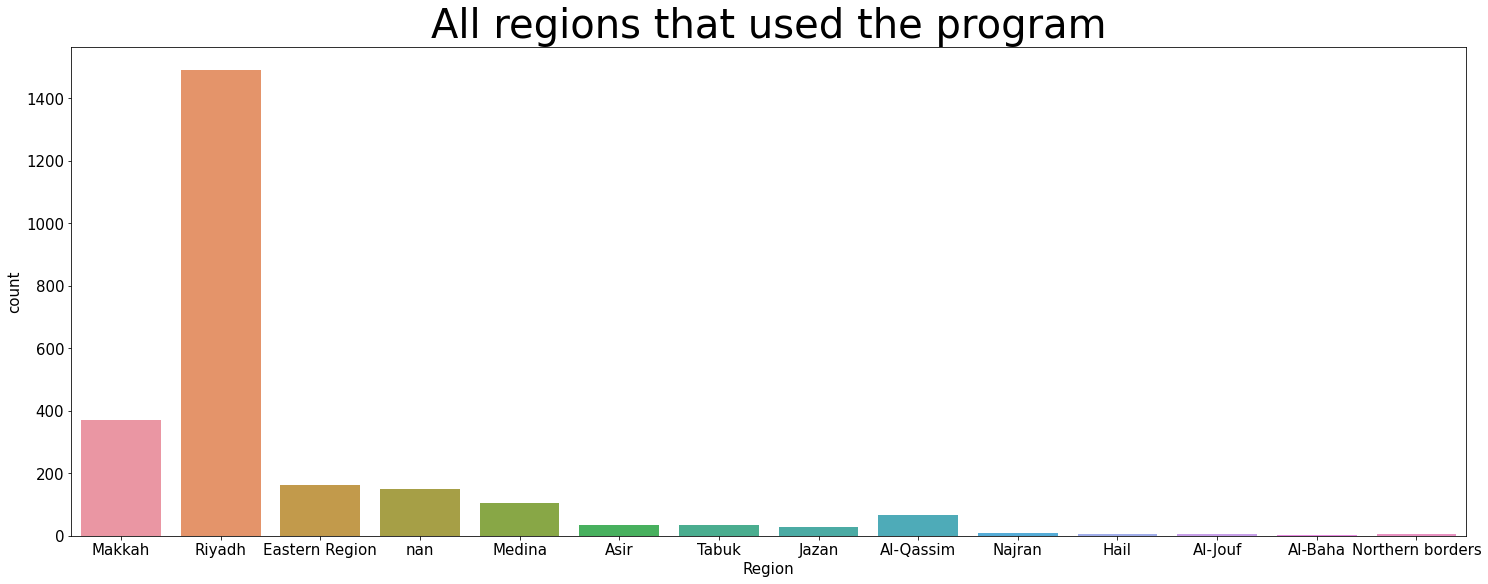

In [279]:
plt.rcParams["font.size"]=(15)
plt.figure(figsize = [25,9])
sns.countplot(x="Region", data=df);
plt.title("All regions that used the program", fontsize=40);

# Notifications
Here I set a condition to send notifications to all qualified status to try to make it an effective status.

In [280]:
df.loc[df['Status'] == "Qualified", 'Notifications'] = 'Dear customer, you are registered in the "Wusool" program, start to use it in one of the delivery applications, thank you' 
df.head(20)

,Status,Region,The first trip date,The last trip date,date of registration,Notifications
ID,,,,,,
1,Effective,Makkah,2021-04-15,2021-04-16,2021-04-12,NaN
2,Effective,Riyadh,2021-03-02,2021-04-20,2021-03-01,NaN
3,Qualified,Eastern Region,NaT,NaT,2021-03-01,"Dear customer, you are registered in the ""Wuso..."
4,Effective,Riyadh,2020-11-04,2021-04-20,2020-11-04,NaN
5,Qualified,Riyadh,NaT,NaT,2021-03-20,"Dear customer, you are registered in the ""Wuso..."
6,Effective,nan,2020-12-30,2021-02-18,2020-12-21,NaN
7,Effective,Eastern Region,2020-12-01,2021-04-15,2020-11-30,NaN
8,Effective,Makkah,2021-01-19,2021-04-12,2021-01-14,NaN
9,Effective,Makkah,2021-01-17,2021-04-18,2021-01-17,NaN


#  Correction in qualified status rows
There are errors or wrong values in some rows of qualified status, qualified status are not supposed to have trips, so instead of making it an effective state (which is another possibility) I make all qualified status without any trips.

In [281]:
df.loc[df['Status'] == "Qualified" , 'The first trip date'] = np.NaN
df.loc[df['Status'] == "Qualified" , 'The last trip date'] = np.NaN
df.loc[df['Region'] == "nan" , 'Region'] = np.NaN
df.head(20)

,Status,Region,The first trip date,The last trip date,date of registration,Notifications
ID,,,,,,
1,Effective,Makkah,2021-04-15,2021-04-16,2021-04-12,NaN
2,Effective,Riyadh,2021-03-02,2021-04-20,2021-03-01,NaN
3,Qualified,Eastern Region,NaT,NaT,2021-03-01,"Dear customer, you are registered in the ""Wuso..."
4,Effective,Riyadh,2020-11-04,2021-04-20,2020-11-04,NaN
5,Qualified,Riyadh,NaT,NaT,2021-03-20,"Dear customer, you are registered in the ""Wuso..."
6,Effective,NaN,2020-12-30,2021-02-18,2020-12-21,NaN
7,Effective,Eastern Region,2020-12-01,2021-04-15,2020-11-30,NaN
8,Effective,Makkah,2021-01-19,2021-04-12,2021-01-14,NaN
9,Effective,Makkah,2021-01-17,2021-04-18,2021-01-17,NaN
